# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Alton Wong 30201904

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yellowbrick

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [50]:
# TODO: Import dataset and inspect the first five columns
column_names = ['Area', 'Perimeter', 'Compactness', 'LengthOfKernel', 'WidthOfKernel', 
                'AsymmetryCoefficient', 'LengthOfKernelGroove', 'Class']
df = pd.read_table('seeds_dataset.txt', names = column_names)
df.head(5)

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [51]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.drop('Class', axis= 1)
y = df['Class']


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

Since I am not sure if the data follows a normal distribution and could have varying scales, I will use the MinMaxScaler

Before we implement the scaler, we need to split the data into training and testing sets first.

In [52]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)


In [53]:
# TODO: Print the shape of the training feature matrix and target vector
print("Training feature matrix shape:", X_train.shape)
print("Training target vector shape:", y_train.shape)

Training feature matrix shape: (157, 7)
Training target vector shape: (157,)


Now that we have our training data, we can implement our selected scaler.

In [54]:
# TODO: Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [55]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [56]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [57]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)
test_score = grid.score(X_test_scaled, y_test)
print("Test set score:", test_score)


Best parameters: {'C': 1.0, 'fit_intercept': True}
Best cross-validation score: 0.930241935483871
Test set score: 0.9245283018867925


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [58]:
# TODO: Predict y labels using best estimator
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

y_pred = grid.best_estimator_.predict(X_test_scaled)


In [59]:
# TODO: Reduce dimensions of test data for plotting
pca = PCA(n_components=3)
X_test_pca = pca.fit_transform(X_test_scaled)

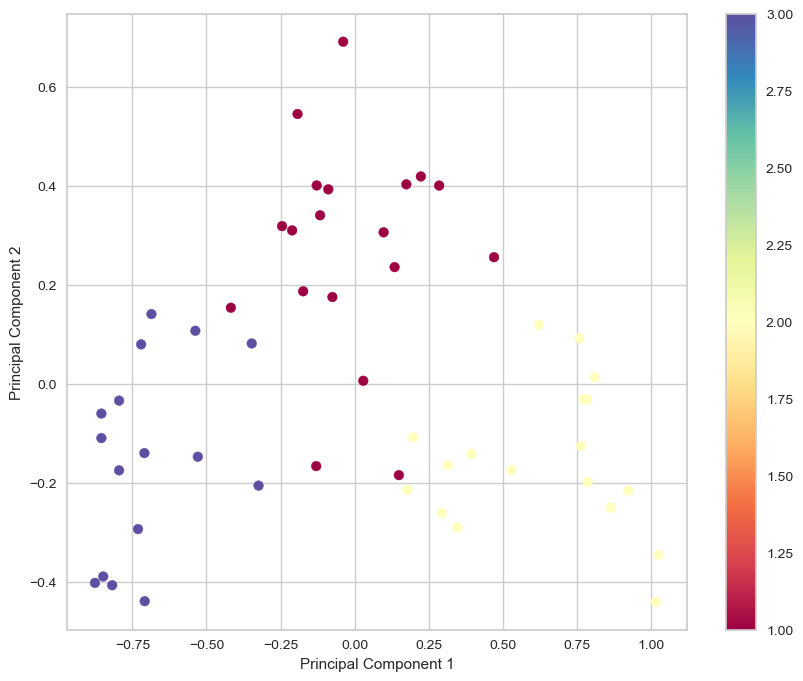

In [60]:
# TODO: Plot test points colored by predicted label
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='Spectral')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()


#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

1. Yes logistic regression worked well for this, as the cv score and test set score were both very high.
2. Yes, PCA seemed to work well for this model. Since PCA and logistic regression are both linear, we could assume that the data is also linear.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I got the code from Python notebooks examples provided from class.
2. I completed the steps in the order provided
3. I did not use any generative AI for this portion.
4. No real challenges for this part of the assignment.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [61]:
# TODO: Scale feature matrix
from sklearn.preprocessing import StandardScaler
column_names = ['Area', 'Perimeter', 'Compactness', 'LengthOfKernel', 'WidthOfKernel', 
                'AsymmetryCoefficient', 'LengthOfKernelGroove', 'Class']
df = pd.read_table('seeds_dataset.txt', names = column_names)
X = df.drop('Class', axis= 1)
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

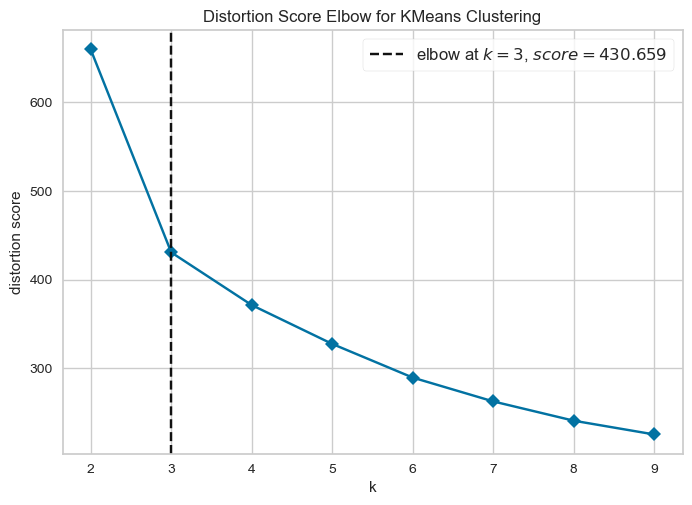

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# TODO: Use the elbow method to determine the optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
visualizer = KElbowVisualizer(KMeans(random_state=4, n_init=10), k=(2,10), metric='distortion', timings=False)
visualizer.fit(X_scaled)  
visualizer.show()


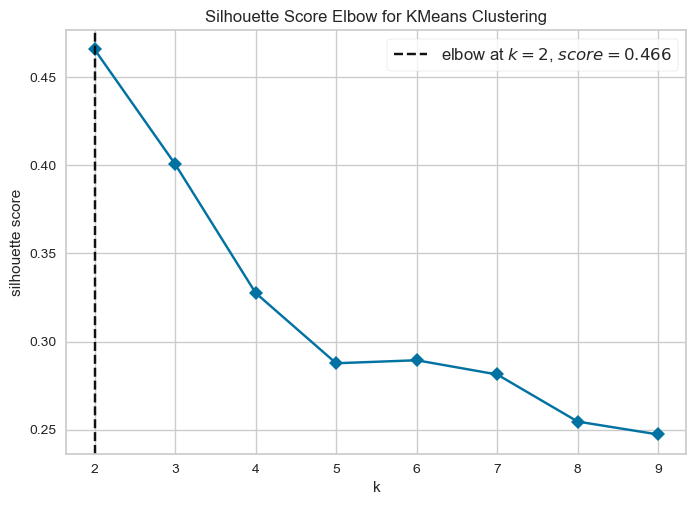

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [63]:
#silhouette
visualizer = KElbowVisualizer(KMeans(random_state=4, n_init=10), k=(2,10), metric='silhouette', timings=False)
visualizer.fit(X_scaled)  
visualizer.show()

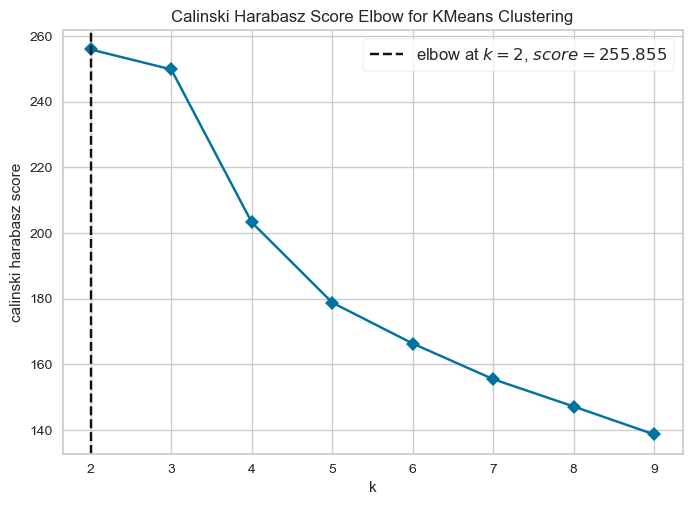

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [64]:
#Calinksi Harabasz
visualizer = KElbowVisualizer(KMeans(random_state=4, n_init=10), k=(2,10), metric='calinski_harabasz', timings=False)
visualizer.fit(X_scaled)  
visualizer.show()

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

- k = 3 for Distrotion
- k = 2 for Silhouette and Calinski_harabasz

In [65]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

/Users/altonwong/miniconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [66]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = kmeans.labels_

# Silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calinski-Harabasz score
calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

# Davies-Bouldin score
davies_bouldin = davies_bouldin_score(X_scaled, labels)
print(f"Davies-Bouldin Score: {davies_bouldin}")

Silhouette Score: 0.40072705527512986
Calinski-Harabasz Score: 249.7841749161647
Davies-Bouldin Score: 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

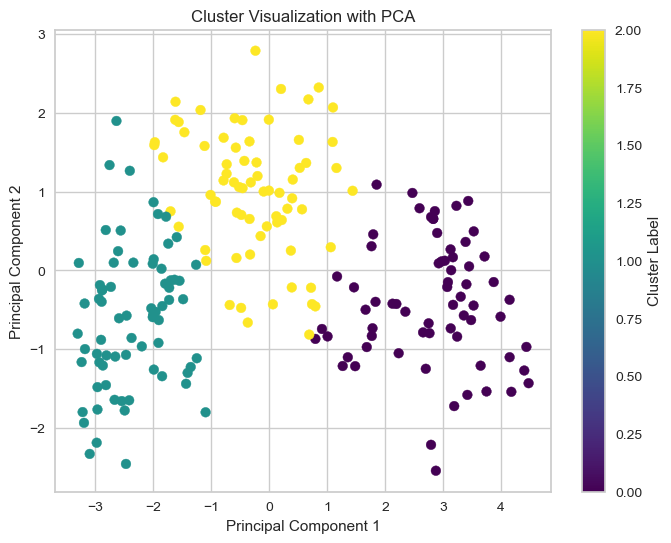

In [67]:
# TODO: Plot clustering results
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Predict the cluster labels
cluster_labels = kmeans.predict(X_scaled)

# Plot the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

# Show the plot
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [68]:
# TODO: Find the number of principal components using explained variance ratio
pca = PCA().fit(X_scaled)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(cumulative_variance_ratio >= 0.95)[0][0] + 1 

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [69]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [70]:
# TODO: Implement K-means with the transformed data
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca)

/Users/altonwong/miniconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [71]:
# TODO: Calculate the three different validation metrics
labels = kmeans.labels_
silhouette_avg = silhouette_score(X_pca, labels)
calinski_harabasz_val = calinski_harabasz_score(X_pca, labels)
davies_bouldin_val = davies_bouldin_score(X_pca, labels)

# Output the scores
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_val}")
print(f"Davies-Bouldin Score: {davies_bouldin_val}")

Silhouette Score: 0.4100823639350389
Calinski-Harabasz Score: 260.28850656356855
Davies-Bouldin Score: 0.9030688438741864


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [72]:
# TODO: Display results
results = {
    'Silhouette Score': silhouette_avg,
    'Calinski-Harabasz Score': calinski_harabasz_val,
    'Davies-Bouldin Score': davies_bouldin_val
}

# Now we'll create a DataFrame to display these in a tabular format
results_df = pd.DataFrame(list(results.items()), columns=['Metric', 'Value'])

# Display the DataFrame
print(results_df)

                    Metric       Value
0         Silhouette Score    0.410082
1  Calinski-Harabasz Score  260.288507
2     Davies-Bouldin Score    0.903069


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

1. Yes, the optimal numbers makes sense because the original dataset has 3 different class labels.
2. The PCA plot from part 1 is similar to the PCA plot from part 2.
3. I used 3 components for the PCA analysis.  But from my metric results, it seems that PCA did not improve my results.  This may be due to the loss of data when reducing the features.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I got my code from the Jupyter notebooks provided in class (intro to pca and intro to clustering)
2. I completed the steps in the order provided.
3. I did use generative AI to ask why my results may have gotten worse.
4. There were no real challenges for this portion of the assignment.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked the plotting of the graphs.  It allowed for some good visualization.

I liked this assignment as it allows us to apply what we covered in class.